# Letter Recognition

## 1. Import needed libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

## 2. Directory listings of the images

_NOTE_: This directory must be set from the shell. It requires some _bash scripting_ knowledge and also needs Shotor dataset to be downloaded in your computer.

In [2]:
os.getenv("SHOTOR_IMAGES")

'/Users/prp-e/Downloads/Shotor_Images'

In [3]:
directory_listing = os.listdir(os.getenv("SHOTOR_IMAGES"))

## 3. Testing and randomizing the data

In [5]:
import random

In [10]:
directory_listing[random.randrange(len(directory_listing))]

'53795.tif'

## 3.1. Testing opencv on a random image from Shotor (To make sure tif is supported)

In [22]:
image_path = os.getenv("SHOTOR_IMAGES") + "/" + directory_listing[random.randrange(len(directory_listing))]

image = cv2.imread(image_path)

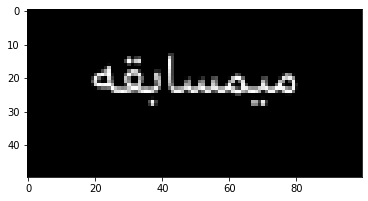

In [23]:
%matplotlib inline

plt.imshow(image)

## 3.2. Developing a function to select 200 images randomly